In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [2]:
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data. (y = 0.203x + 0.459)
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.) 0.69 - not a great fit
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping? 19.7
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 86.4

In [4]:
ground_temp = df[["Ground Temperature"]]
chirps = df["Chirps/Second"]

In [31]:
regr1 = linear_model.LinearRegression()

regr1.fit(ground_temp, chirps)
print('Coefficients: \n', regr1.coef_)
print("Residual sum of squares: %.2f"
      % np.mean((regr1.predict(ground_temp) - chirps) ** 2))
print('Variance Score: %.2f' % regr1.score(ground_temp, chirps))
print("Y-Intercept: ", regr1.intercept_)

Coefficients: 
 [ 0.20299973]
Residual sum of squares: 0.84
Variance Score: 0.69
Y-Intercept:  0.459314645236


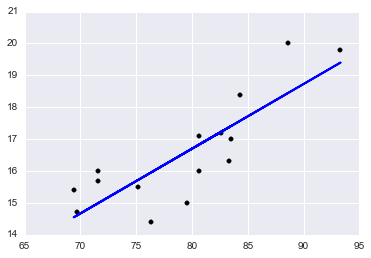

In [8]:
plt.scatter(ground_temp, chirps, color='black')
plt.plot(ground_temp, regr1.predict(ground_temp), color='blue', linewidth=2)

In [10]:
regr1.predict(95)

array([ 19.74428913])

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight. (y = 0.903x - 56.86)
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.) 0.87 - this is a good fit

In [11]:
df2 = pd.read_fwf("brain_body.txt")

In [12]:
body = df2[["Body"]]
brain = df2["Brain"]

In [32]:
regr2 = linear_model.LinearRegression()

regr2.fit(body, brain)
print('Coefficients: \n', regr2.coef_)
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(body) - brain) ** 2))
print('Variance Score: %.2f' % regr2.score(body, brain))
print("Y-Intercept: ", regr2.intercept_)

Coefficients: 
 [ 0.90291295]
Residual sum of squares: 101290.31
Variance Score: 0.87
Y-Intercept:  -56.8555454286


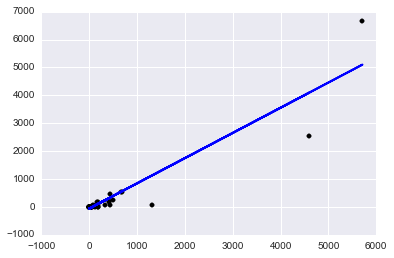

In [16]:
plt.scatter(body, brain, color='black')
plt.plot(body, regr2.predict(body), color='blue', linewidth=2)

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score. (Rank and Year are the best 2 column combination (0.8436), Rank, Year, YSDeg for 3 (0.84567), include Sex for 4 columns (0.84903), but all 5 columns is actually best (0.8547).)
3. Report whether sex is a factor in salary. (It doesn't seem to be - the $R^2$ score for sex and salary is 0.064. Rank seems to have the highest $R^2$ score of 0.75. You could argue that it does play a role, since including Sex as a 4th column does bump the accuracy up, but only by a tiny amount.)

In [37]:
df3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [38]:
indicators = df3[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]
sal = df3['Salary']

In [39]:
regr3 = linear_model.LinearRegression()

regr3.fit(indicators, sal)
print('Coefficients: \n', regr3.coef_)
print('Variance Score: %.2f' % regr3.score(indicators, sal))

Coefficients: 
 [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354]
Variance Score: 0.85


In [40]:
import itertools

In [49]:
dependent_vars = list(indicators.columns)
combos = list(itertools.combinations(dependent_vars, 1))

In [52]:
choices = []

def regression_for(combo):
    combo = list(combo)
    df = df3.loc[:, combo + ['Salary']]
    df.dropna(inplace=True)
    input_data = df[combo]
    salary = df['Salary']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, salary)
    return regr, regr.score(input_data, salary)

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
for choice in choices:
    print(choice)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

(('Sex',), 0.063898925832880038)
(('Rank',), 0.75253605392746314)
(('Year',), 0.49093702676921624)
(('Degree',), 0.0048616809847483733)
(('YSdeg',), 0.45542813458360276)
[ 5952.77890467] 11663.143002


In [66]:
choices2 = []

combos2 = list(itertools.combinations(dependent_vars, 5))

for combo in combos2:
    regr, score = regression_for(combo)
    choices2.append((combo, score))

best = sorted(choices2, key=lambda x: x[1])[-1]
print(best)


(('Sex', 'Rank', 'Year', 'Degree', 'YSdeg'), 0.85471806744109691)
